In [1]:
import pandas as pd

import utils
import numpy as np
import tensorflow as tf
from Code import evaluations
from Code import classifiers

In [2]:
df5s, df10s, _ = utils.task4_df()

Training model 1
Training model 2
Training model 3
Training model 4
Training model 5
Training model 6
Training model 7
Training model 8
Training model 9
Training model 10


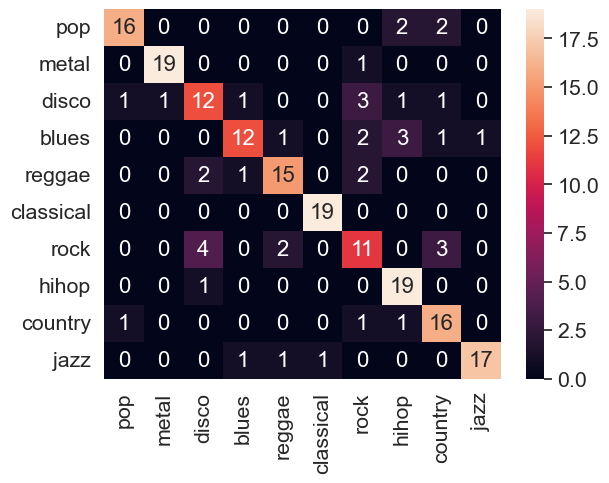

Accuracy : 0.7878787878787878
Macro F1 score : 0.7869522468378303


,tp,tn,fp,fn,F1Score
pop,16,176,2,4,0.842105
metal,19,177,1,1,0.950000
disco,12,171,7,8,0.615385
blues,12,175,3,8,0.685714
reggae,15,174,4,5,0.769231
classical,19,178,1,0,0.974359
rock,11,169,9,9,0.550000
hihop,19,171,7,1,0.826087
country,16,172,7,3,0.761905
jazz,17,177,1,3,0.894737


In [3]:
models = classifiers.build_ensemble_lstm(df5s, nmodels=10)
_, _, x_test, y_test = utils.preproccess_for_lstm(df5s)
ensemble_prediction = classifiers.predict_ensemble_lstm(x_test, models)
models_accuracies, predictor_perf = evaluations.evaluate_ensemble_lstm(ensemble_prediction, y_test)
print(f"Accuracy : {models_accuracies['combined']}\n"
      f"Macro F1 score : {predictor_perf.F1Score.mean()}")
predictor_perf